# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [131]:
#Type your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [132]:
#memuat dataset yang telah di unduh pada keggle
df = pd.read_csv('Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [133]:
# untuk menampilkan jumlah baris dan kolom
print(df.shape)

(2000, 8)


In [134]:
# memeriksa data yang kosong pada setiap kolom
print(df.isnull().sum())

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [135]:
# mengatasi missing value pada kolom kategorikal professional dengan kategori Unknown
df['Profession'].fillna('Unknown', inplace=True)

C:\Users\rasyid\AppData\Local\Temp\ipykernel_9100\3369594076.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Profession'].fillna('Unknown', inplace=True)


In [136]:
# memeriksa kembali data yang kosong pada setiap kolom
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


In [137]:
# menampilkan informasi ringkas pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              2000 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [138]:
# menampilkan data deskriptif dari dataset
df.describe(include="all")

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000,2000.000000,2000.000000
unique,NaN,2,NaN,NaN,NaN,10,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,Artist,NaN,NaN
freq,NaN,1186,NaN,NaN,NaN,612,NaN,NaN
mean,1000.500000,NaN,48.960000,110731.821500,50.962500,NaN,4.102500,3.768500
std,577.494589,NaN,28.429747,45739.536688,27.934661,NaN,3.922204,1.970749
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,500.750000,NaN,25.000000,74572.000000,28.000000,NaN,1.000000,2.000000
50%,1000.500000,NaN,48.000000,110045.000000,50.000000,NaN,3.000000,4.000000
75%,1500.250000,NaN,73.000000,149092.750000,75.000000,NaN,7.000000,5.000000


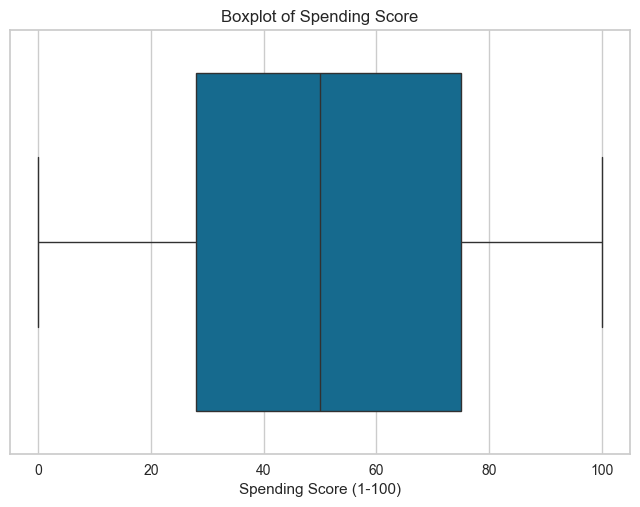

In [139]:
# boxplot untuk 'Spending Score'

sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score')
plt.show()

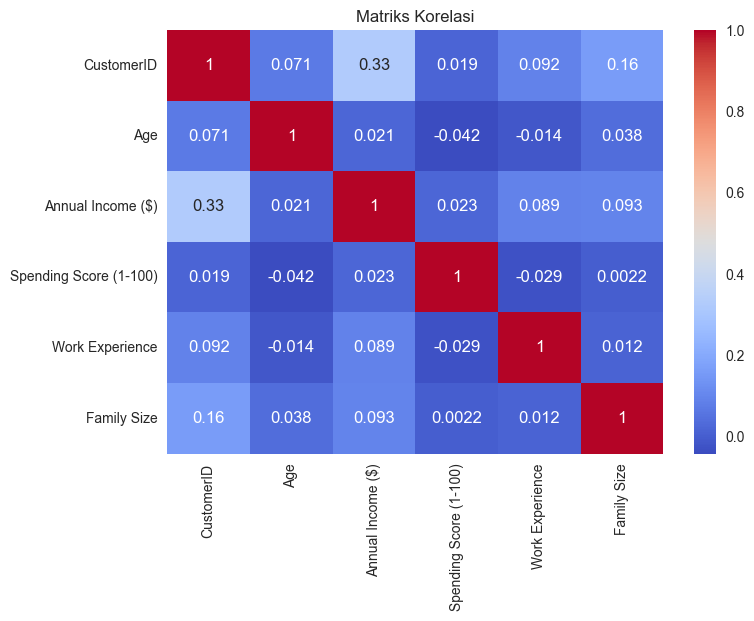

In [140]:
# korelasi antar variabel hanya pada kolom numerik
numeric = df.select_dtypes(include=[np.number])
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


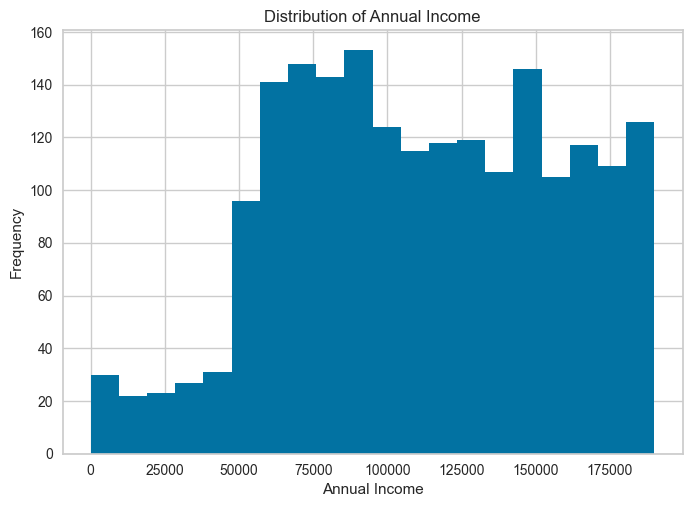

In [141]:
# distribusi bverupa histrogram dari anual income
df['Annual Income ($)'].hist(bins=20)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
plt.show()

C:\Users\rasyid\AppData\Local\Temp\ipykernel_9100\4244989384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Profession', order=df['Profession'].value_counts().index, palette='viridis')


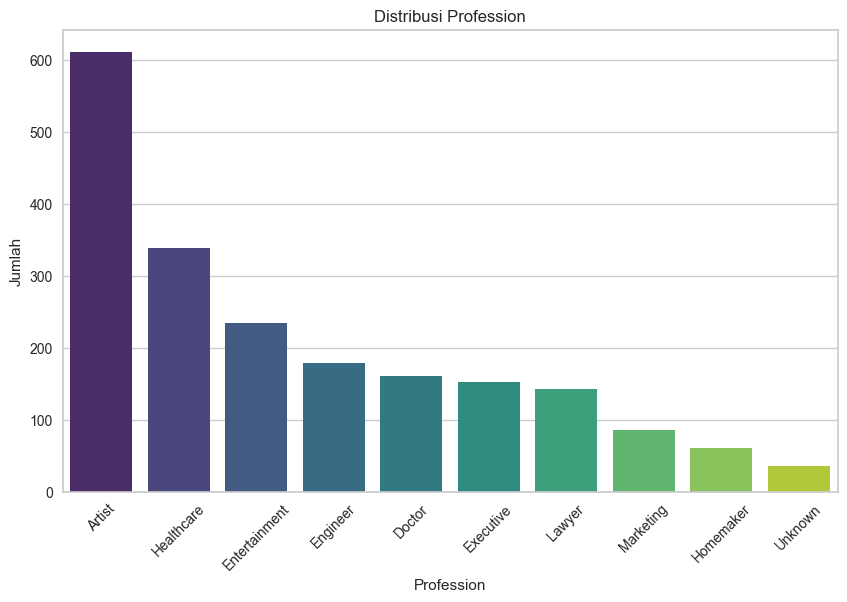

In [142]:
# visualisasi untuk data kategorikal kolom professional
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Profession', order=df['Profession'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribusi Profession')
plt.xlabel('Profession')
plt.ylabel('Jumlah')
plt.show()

In [143]:
# untuk data kategorikal

category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,Gender,Profession
0,Male,Healthcare
1,Male,Engineer
2,Female,Engineer
3,Female,Lawyer
4,Female,Entertainment
...,...,...
1995,Female,Artist
1996,Female,Doctor
1997,Male,Healthcare
1998,Male,Executive


In [144]:
# melakukan encoding pada data kategorikal
df_one_hot = pd.get_dummies(df, columns=category_features)
df_one_hot

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown
0,1,19,15000,39,1,4,False,True,False,False,False,False,False,True,False,False,False,False
1,2,21,35000,81,3,3,False,True,False,False,True,False,False,False,False,False,False,False
2,3,20,86000,6,1,1,True,False,False,False,True,False,False,False,False,False,False,False
3,4,23,59000,77,0,2,True,False,False,False,False,False,False,False,False,True,False,False
4,5,31,38000,40,2,6,True,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71,184387,40,8,7,True,False,True,False,False,False,False,False,False,False,False,False
1996,1997,91,73158,32,7,7,True,False,False,True,False,False,False,False,False,False,False,False
1997,1998,87,90961,14,9,2,False,True,False,False,False,False,False,True,False,False,False,False
1998,1999,77,182109,4,7,2,False,True,False,False,False,False,True,False,False,False,False,False


In [145]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)
 
for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])
 
# Menampilkan hasil
df_lencoder

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6
...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,0,8,7
1996,1997,0,91,73158,32,1,7,7
1997,1998,1,87,90961,14,5,9,2
1998,1999,1,77,182109,4,4,7,2


In [146]:
#Type your code here

df_lencoder.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6


In [147]:
# Crosstab antara Age dan Profession
crosstab = pd.crosstab(df_lencoder['Age'], df_lencoder['Profession'])
print(crosstab)

Profession   0  1  2  3  4  5  6  7  8  9
Age                                      
0            5  4  2  3  1  1  0  3  4  1
1           10  4  1  4  1  3  0  2  0  1
2            3  0  0  2  4  3  1  2  0  0
3            1  2  1  0  5  8  1  0  0  0
4            6  1  1  1  0  3  2  1  0  0
..          .. .. .. .. .. .. .. .. .. ..
95           7  1  3  4  1  2  0  1  0  2
96           6  1  3  4  1  3  1  2  1  0
97           8  2  1  3  1  4  1  1  1  0
98           4  1  3  1  0  0  0  0  0  0
99           2  0  3  4  2  3  0  1  1  1

[100 rows x 10 columns]


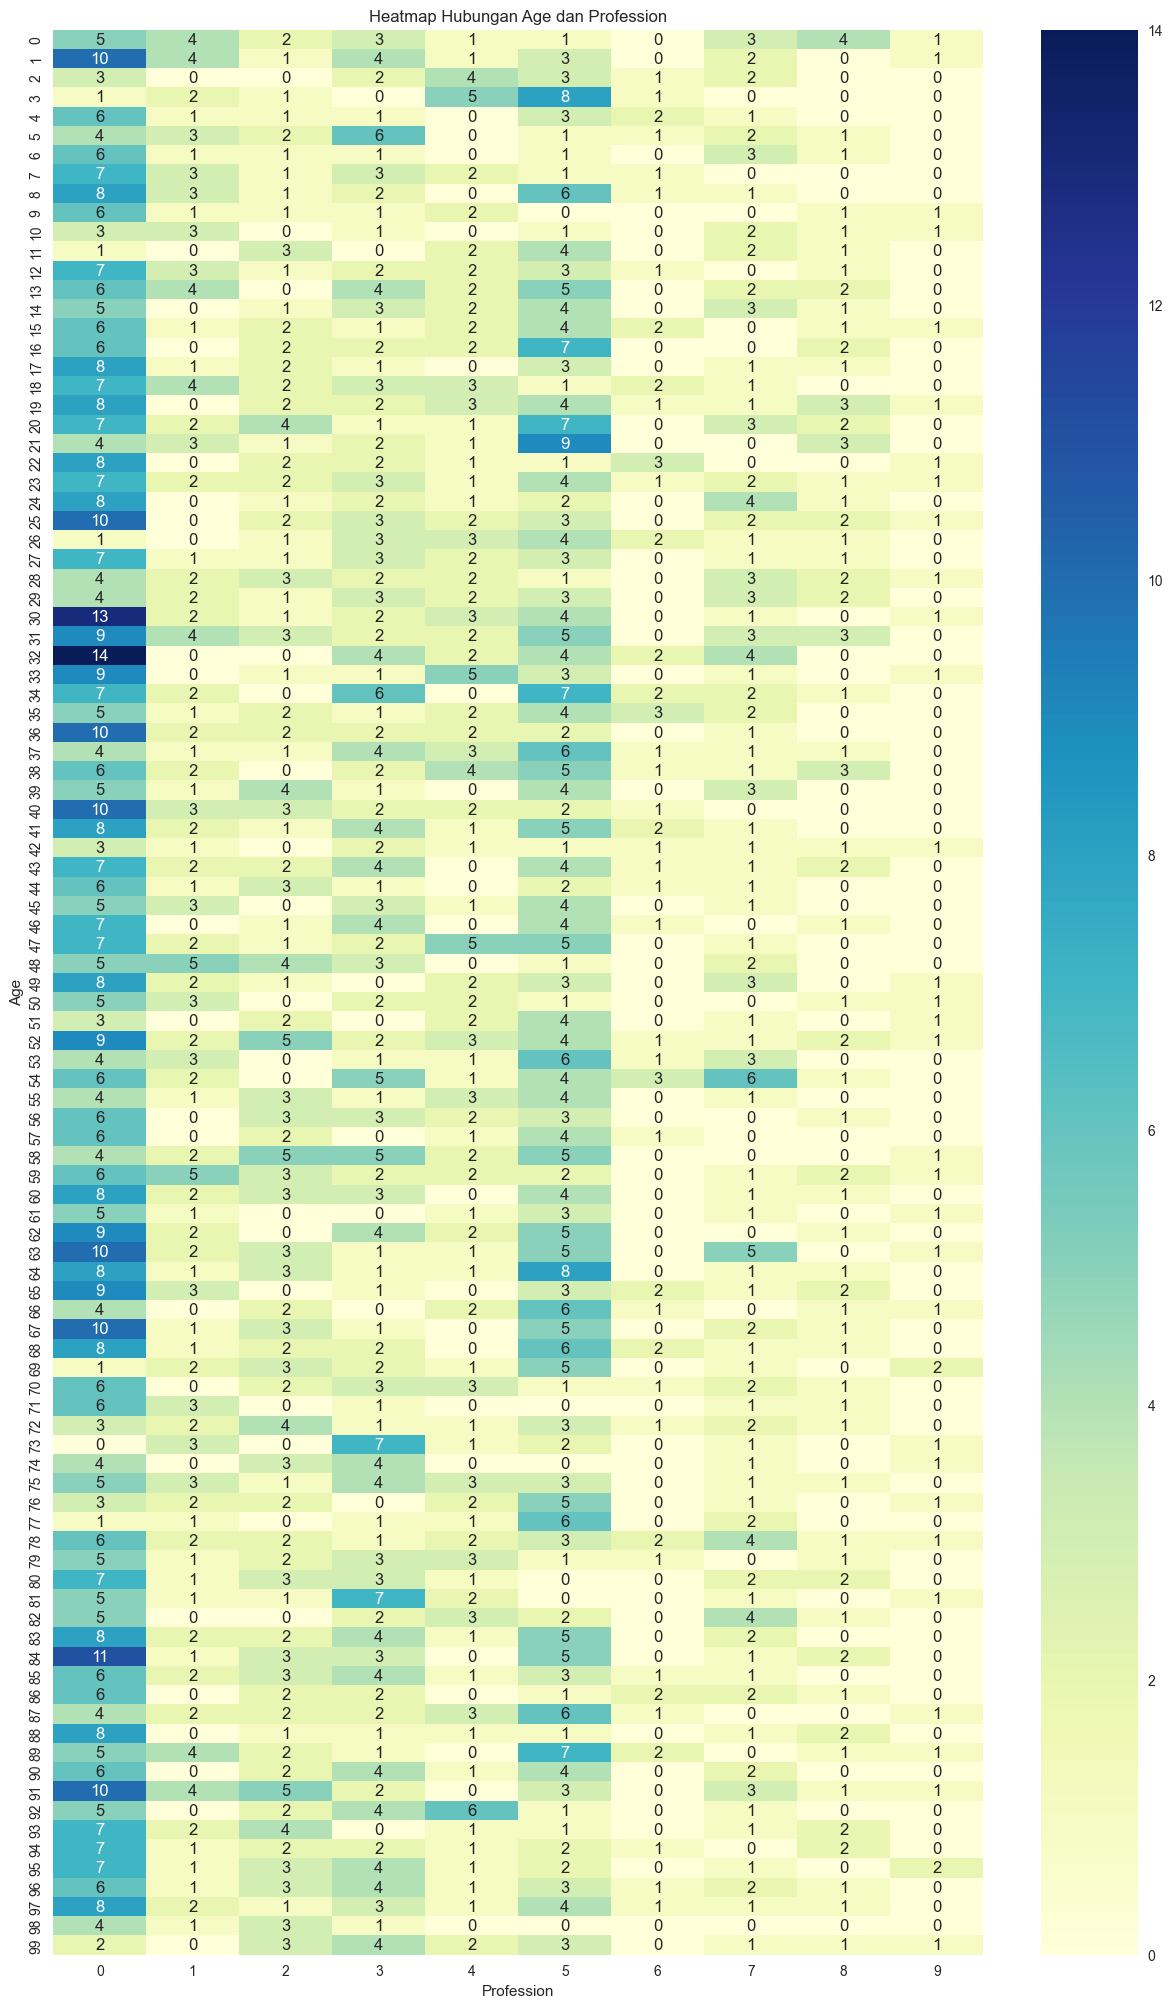

In [148]:
# Heatmap hubungan antara Age dan Profession
plt.figure(figsize=(15, 25))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap Hubungan Age dan Profession')
plt.xlabel('Profession')
plt.ylabel('Age')
plt.show()

In [149]:

# Cek nilai unik dalam kolom Profession
print(df['Profession'].unique())

# Hitung jumlah tiap kategori
print(df['Profession'].value_counts())

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' 'Unknown']
Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Unknown           35
Name: count, dtype: int64


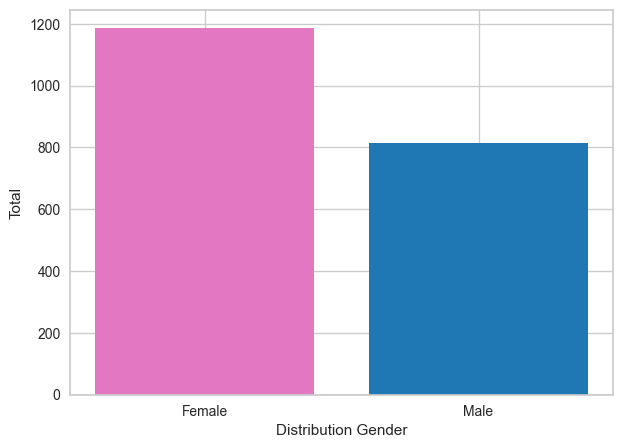

In [150]:
# pengelompokan data
# visualisasi gender

gender_counts = df['Gender'].value_counts()

colors = ['tab:pink','tab:blue']
plt.figure(figsize=(7,5))
plt.bar(gender_counts.index, gender_counts.values, color=colors)

plt.ylabel('Total')
plt.xlabel('Distribution Gender')
plt.xticks(rotation=0)

plt.show()


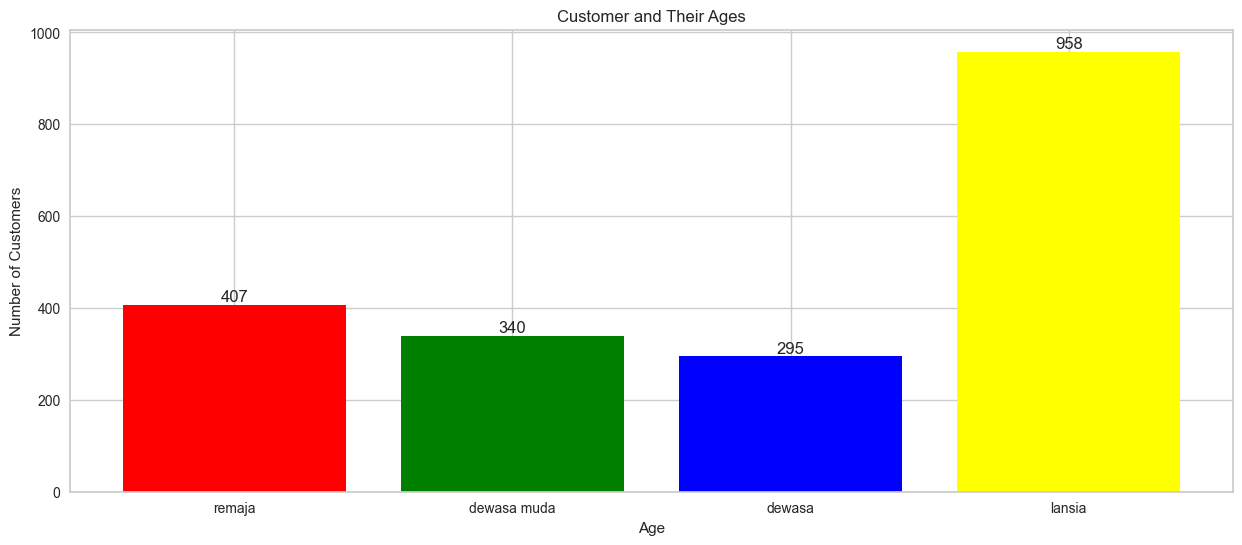

In [151]:
# pengelompokan usia
age_remaja = df.Age[(df.Age <= 20)]
age_dewasa_muda = df.Age[(df.Age >= 21) & (df.Age <= 35)]
age_dewasa = df.Age[(df.Age >= 36) & (df.Age <= 50)]
age_lansia = df.Age[(df.Age >= 51)]

## Menyusun data untuk plotting
x = ["remaja", "dewasa muda", "dewasa", "lansia"]
y = [len(age_remaja.values), len(age_dewasa_muda.values), len(age_dewasa.values), len(age_lansia.values)]
 
# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
 
plt.show()

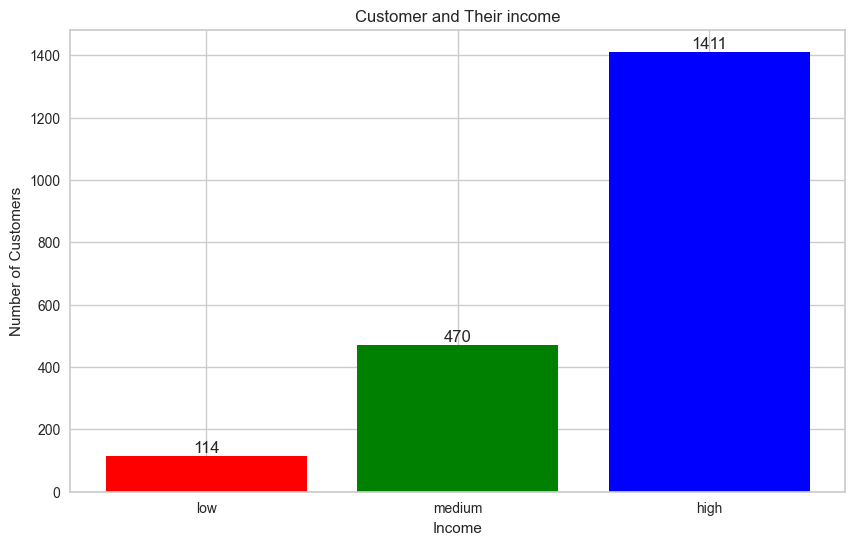

In [152]:
# mengelompokan anual income

# pengelompokan usia
income_low = df["Annual Income ($)"][(df["Annual Income ($)"] <= 40000)]
income_medium = df["Annual Income ($)"][ (df["Annual Income ($)"] >= 41000) & (df["Annual Income ($)"] <= 80000)]
income_high = df["Annual Income ($)"][(df["Annual Income ($)"] >= 81000) ]


## Menyusun data untuk plotting
aix = ["low", "medium", "high"]
aiy = [len(income_low.values), len(income_medium.values), len(income_high.values)]
 
# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(10, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue'])
plt.title("Customer and Their income")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
    plt.text(i, aiy[i] + 2, str(aiy[i]), ha='center', va='bottom', fontsize=12)

plt.show()

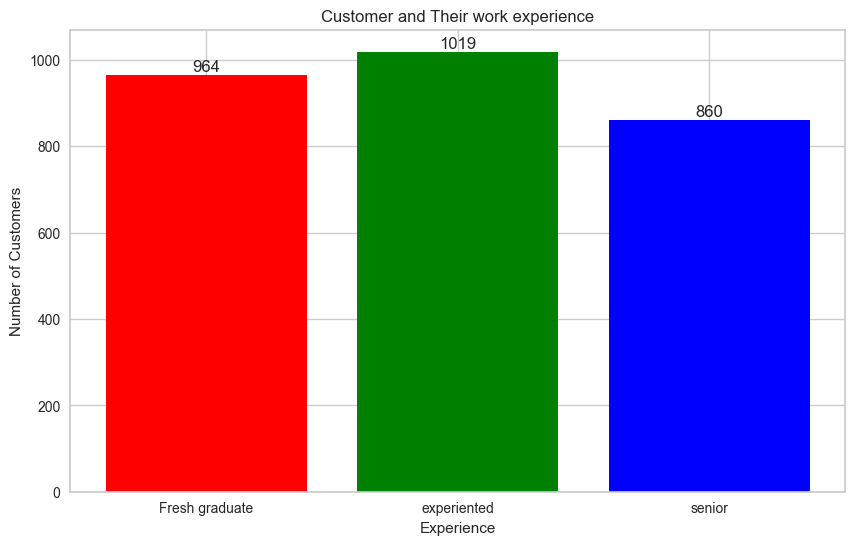

In [153]:
# pengelompokan kolom workd expirience

exp_fg = df["Work Experience"][(df["Work Experience"] <= 2 )]
exp_e = df["Work Experience"][(df["Work Experience"] <= 3 ) & (df["Work Experience"] <= 5 ) ]
exp_s = df["Work Experience"][(df["Work Experience"] >= 5 )]

## Menyusun data untuk plotting
expx = ["Fresh graduate", "experiented", "senior"]
expy = [len(exp_fg.values), len(exp_e.values), len(exp_s.values)]
 
# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(10, 6))
plt.bar(expx, expy, color=['red', 'green', 'blue'])
plt.title("Customer and Their work experience")
plt.xlabel("Experience")
plt.ylabel("Number of Customers")
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(expx)):
    plt.text(i, expy[i] + 2, str(expy[i]), ha='center', va='bottom', fontsize=12)

plt.show()


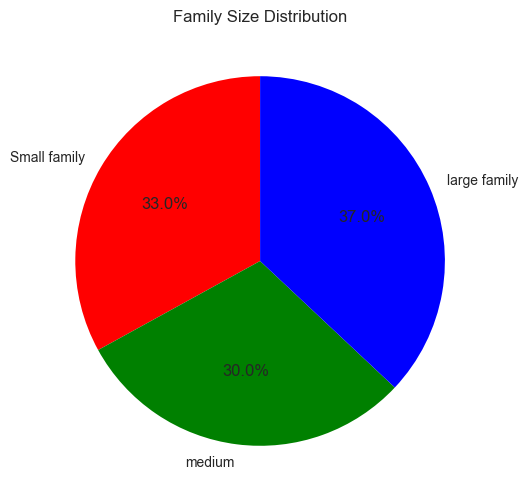

In [154]:
#pengelompokan family size
sf = df['Family Size'][(df['Family Size'] <= 2)]
mf = df['Family Size'][(df['Family Size'] >= 3) & (df['Family Size'] <= 4)]
lf = df['Family Size'][(df['Family Size'] >= 5) ]

fx = ["Small family", "medium", "large family"]
fy = [len(sf.values), len(mf.values), len(lf.values)]

# Membuat bar chart 
plt.figure(figsize=(10, 6))
plt.pie(fy, labels=fx, autopct='%1.1f%%', colors=['red', 'green', 'blue'], startangle=90)
plt.title("Family Size Distribution")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [155]:
# memeriksa data yang kosong pada setiap kolom
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


In [156]:
# melakukan cek duplikasi data

duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income ($), Spending Score (1-100), Profession, Work Experience, Family Size]
Index: []


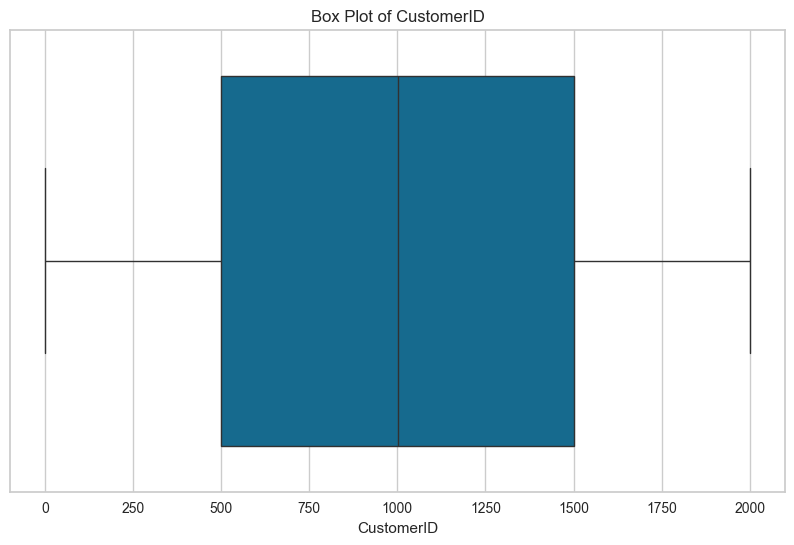

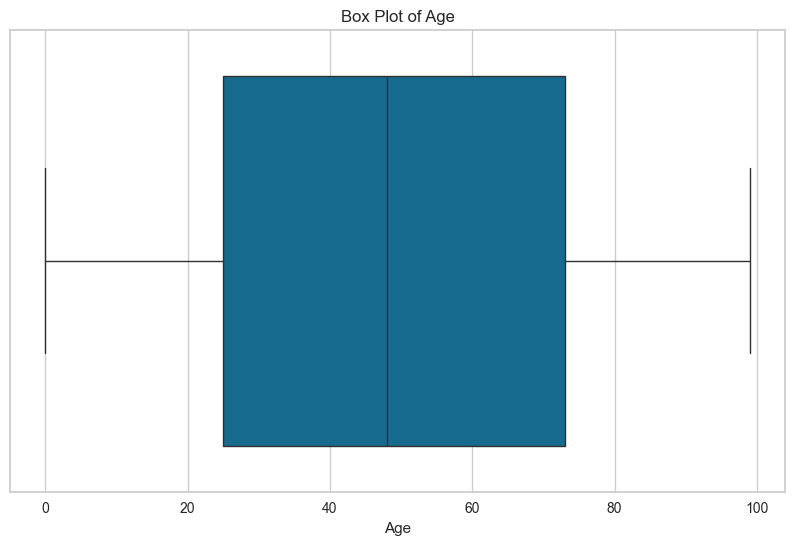

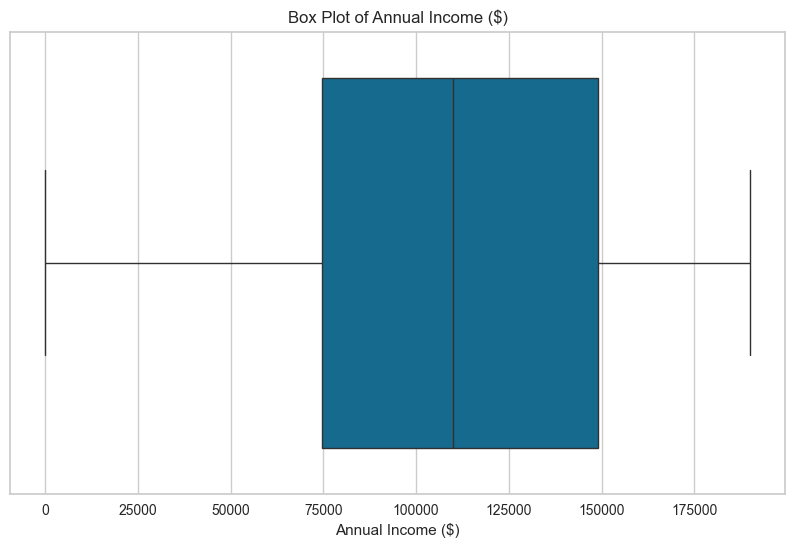

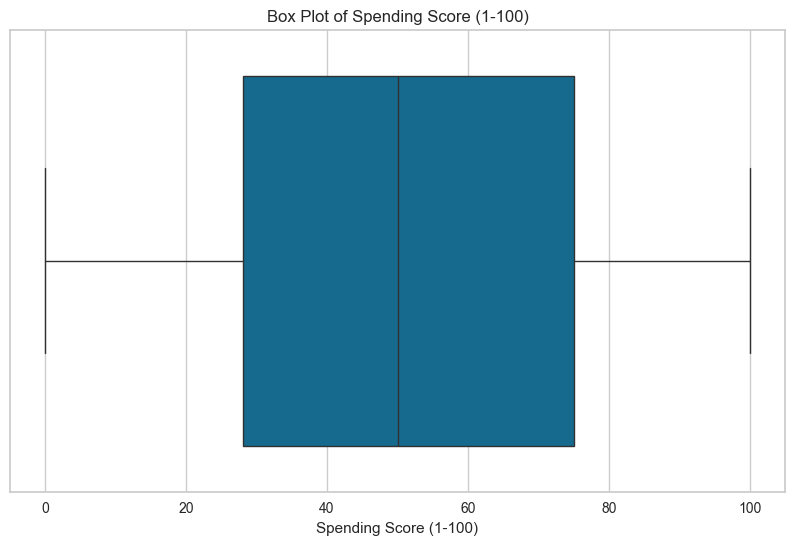

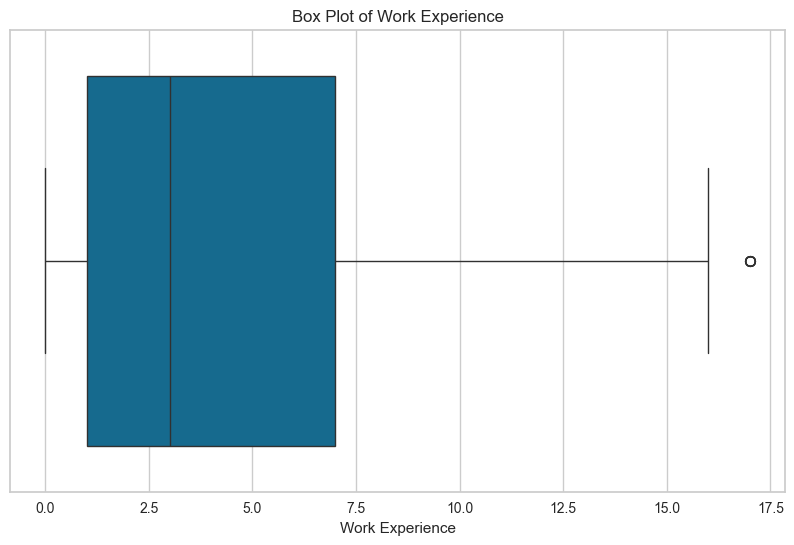

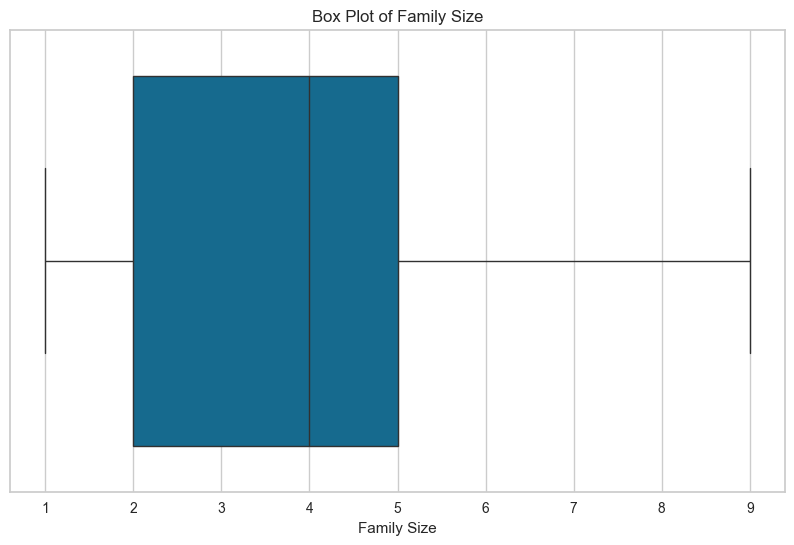

In [157]:
# melakukan cek outliner
for feature in numeric:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

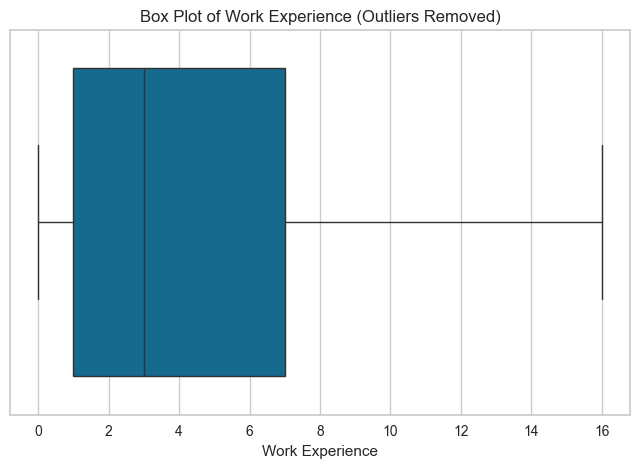

In [158]:
# menghapus outliners dari workd experience
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = df['Work Experience'].quantile(0.25)
Q3 = df['Work Experience'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus data yang berada di luar batas bawah dan atas
df_clean = df[(df['Work Experience'] >= lower_bound) & (df['Work Experience'] <= upper_bound)]

# Menampilkan box plot setelah menghapus outlier
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['Work Experience'])
plt.title("Box Plot of Work Experience (Outliers Removed)")
plt.show()


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [159]:
# data splitting
data_split = df.iloc[:, [2,3,4,6]].values

print(pd.DataFrame(data_split, columns=['Age', 'Annual Income ($)','Spending Score (1-100)' ,'Work Experience']))


      Age  Annual Income ($)  Spending Score (1-100)  Work Experience
0      19              15000                      39                1
1      21              35000                      81                3
2      20              86000                       6                1
3      23              59000                      77                0
4      31              38000                      40                2
...   ...                ...                     ...              ...
1995   71             184387                      40                8
1996   91              73158                      32                7
1997   87              90961                      14                9
1998   77             182109                       4                7
1999   90             110610                      52                5

[2000 rows x 4 columns]


In [172]:
# pembagian cluster Age  Annual Income ($)  Spending Score (1-100)  Work Experience

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_split)
 
# Mendapatkan label cluster
labels = kmeans.labels_
 
# Mendapatkan jumlah cluster
k = 3
 
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
 
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_age = cluster_data[:, 0].mean()  # Rata-rata Annual Income
        mean_income = cluster_data[:, 1].mean()  # Rata-rata Spending Score
        mean_spending = cluster_data[:, 2].mean()  # Rata-rata Spending Score
        mean_experience = cluster_data[:, 3].mean()  # Rata-rata Spending Score
 
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Age): {mean_age:.2f}")
        print(f"Rata-rata Spending Annual Income ($): {mean_income:.2f}")
        print(f"Rata-rata Spending Score (1-100): {mean_spending:.2f}")
        print(f"Rata-rata Work Experience : {mean_experience:.2f}")
 
# Analisis karakteristik setiap cluster
analyze_clusters(data_split, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Age): 51.00
Rata-rata Spending Annual Income ($): 106033.98
Rata-rata Spending Score (1-100): 51.14
Rata-rata Work Experience : 4.25

Cluster 2:
Rata-rata Age): 48.53
Rata-rata Spending Annual Income ($): 161639.66
Rata-rata Spending Score (1-100): 52.16
Rata-rata Work Experience : 4.33

Cluster 3:
Rata-rata Age): 47.02
Rata-rata Spending Annual Income ($): 56164.80
Rata-rata Spending Score (1-100): 49.34
Rata-rata Work Experience : 3.65


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

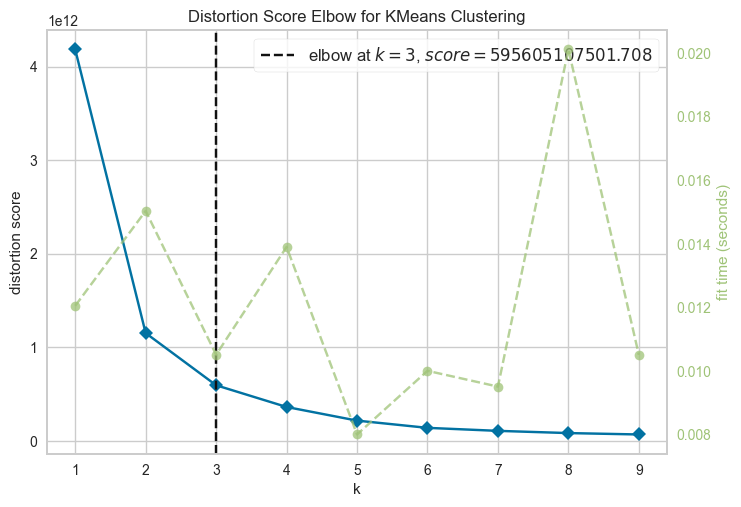

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [161]:
# melakukan clustering dengan menggunakan kmeans clustering
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(data_split)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [162]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(data_split, labels)
print(f"Silhouette Score untuk {k} cluster: {silhouette_avg:.4f}")

Silhouette Score untuk 3 cluster: 0.5576


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [163]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [167]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Age: 51.01
Rata-rata Annual Income ($): 106441.03
Rata-rata Spending Score (1-100): 51.10
Rata-rata Work Experience: 4.26

Cluster 2:
Rata-rata Age: 47.05
Rata-rata Annual Income ($): 56416.23
Rata-rata Spending Score (1-100): 49.57
Rata-rata Work Experience: 3.65

Cluster 3:
Rata-rata Age: 48.51
Rata-rata Annual Income ($): 161839.28
Rata-rata Spending Score (1-100): 52.01
Rata-rata Work Experience: 4.33



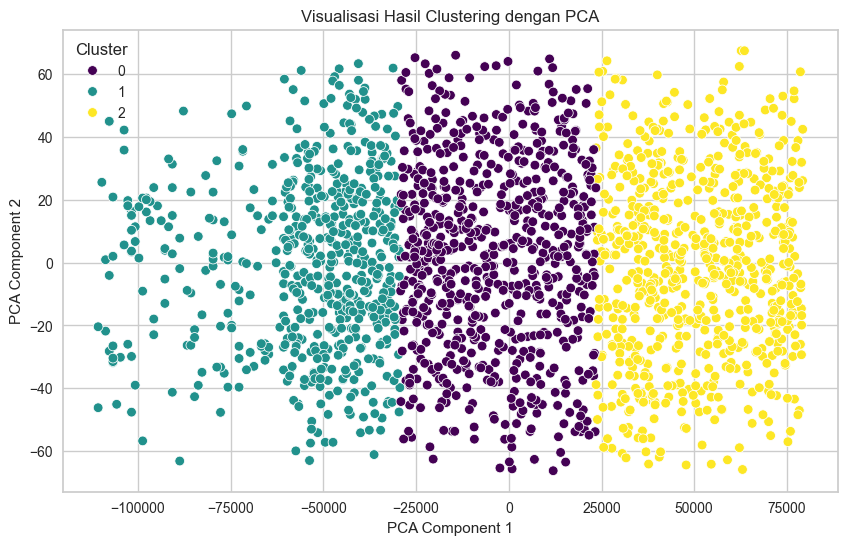

In [174]:
# Inisialisasi model KMeans dengan 3 cluster
k = 3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
labels = kmeans.fit_predict(data_split)

# Konversi data ke DataFrame agar lebih mudah dianalisis
columns = ["Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience"]
df = pd.DataFrame(data_split, columns=columns)
df["Cluster"] = labels

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(df, k):
    print("Analisis Karakteristik Setiap Cluster:\n")
    
    cluster_summary = []
    for cluster_id in range(k):
        cluster_data = df[df["Cluster"] == cluster_id]
        
        # Menghitung rata-rata setiap fitur dalam cluster
        mean_values = cluster_data.mean()
        
        # Menampilkan hasil analisis
        print(f"Cluster {cluster_id + 1}:")
        print(f"Rata-rata Age: {mean_values['Age']:.2f}")
        print(f"Rata-rata Annual Income ($): {mean_values['Annual Income ($)']:.2f}")
        print(f"Rata-rata Spending Score (1-100): {mean_values['Spending Score (1-100)']:.2f}")
        print(f"Rata-rata Work Experience: {mean_values['Work Experience']:.2f}\n")
        
        cluster_summary.append(mean_values)
    
    return pd.DataFrame(cluster_summary)

# Analisis cluster
cluster_analysis = analyze_clusters(df, k)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_split)

df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="viridis", data=df)
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [169]:
df.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Cluster,PCA1,PCA2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03
mean,48.960000,110731.821500,50.962500,4.102500,0.992500,-2.235174e-11,-2.160050e-15
std,28.429747,45739.536688,27.934661,3.922204,0.837732,4.573954e+04,2.881467e+01
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.107318e+05,-6.631362e+01
25%,25.000000,74572.000000,28.000000,1.000000,0.000000,-3.615982e+04,-2.151056e+01
50%,48.000000,110045.000000,50.000000,3.000000,1.000000,-6.868214e+02,9.737819e-01
75%,73.000000,149092.750000,75.000000,7.000000,2.000000,3.836093e+04,2.127368e+01
max,99.000000,189974.000000,100.000000,17.000000,2.000000,7.924218e+04,6.749457e+01


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [178]:
df.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Cluster,PCA1,PCA2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03
mean,48.960000,110731.821500,50.962500,4.102500,0.992500,-2.235174e-11,-2.160050e-15
std,28.429747,45739.536688,27.934661,3.922204,0.837732,4.573954e+04,2.881467e+01
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.107318e+05,-6.631362e+01
25%,25.000000,74572.000000,28.000000,1.000000,0.000000,-3.615982e+04,-2.151056e+01
50%,48.000000,110045.000000,50.000000,3.000000,1.000000,-6.868214e+02,9.737819e-01
75%,73.000000,149092.750000,75.000000,7.000000,2.000000,3.836093e+04,2.127368e+01
max,99.000000,189974.000000,100.000000,17.000000,2.000000,7.924218e+04,6.749457e+01


In [177]:
print(cluster_analysis)

         Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0  51.011283      106441.029619               51.102962         4.259520   
1  47.045226       56416.232831               49.574539         3.648241   
2  48.511527      161839.282421               52.012968         4.332853   

   Cluster  
0      0.0  
1      1.0  
2      2.0  


Tulis hasil interpretasinya di sini.
1. Cluster 1: pendapatan yang cukup, memiliki potensi dalam pemasaran mengenai produk yang bersifat fungsional
2. Cluster 2: pendapatan dengan rendah sampai menengah, memiliki potensi dalam pemasaran produk dengan harga yang terjangkau yang dapat membantu meningkatkan daya beli customer
3. Cluster 3: pendapatan tinggi dan juga memiliki pengeluaran yang besar dan memiliki potensi dalam memasarkan produk yang memiliki harga barang yang tinggi

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [179]:
df.to_csv('result_clustering')